In [29]:
import numpy as np 
import pandas as pd 
import os
import gc 
import matplotlib.pyplot as plt
# import bokeh
%matplotlib inline
import seaborn as sns
p = sns.color_palette()

In [4]:
df_train = pd.read_csv('clicks_train.csv')
df_test = pd.read_csv('clicks_test.csv')

In [8]:
print("no of rows in training set:", len(df_train))
print("no of rows in testing set:", len(df_test))

no of rows in training set: 87141731
no of rows in testing set: 32225162


In [19]:
# df_train['display_id'].value_counts
print("the number of displays in the training set is", len(df_train['display_id'].value_counts()))
print("the number of ads in the training set is", len(df_train['ad_id'].value_counts()))
print("the number of displays in the testing set is", len(df_test['display_id'].value_counts()))
print("the number of ads in the testing set is", len(df_test['ad_id'].value_counts()))

the number of displays in the training set is 16874593
the number of ads in the training set is 478950
the number of displays in the testing set is 6245533
the number of ads in the testing set is 381385


We have used some code from a kaggle script here to look at the data. 

Ads that appear less than 2 times: 22.69%
Ads that appear less than 10 times: 61.74%
Ads that appear less than 50 times: 86.93%
Ads that appear less than 100 times: 91.04%
Ads that appear less than 1000 times: 97.45%


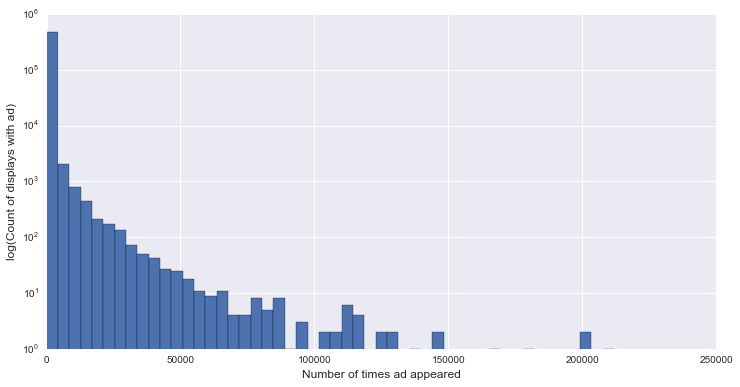

In [21]:
# https://www.kaggle.com/anokas/outbrain-click-prediction/outbrain-eda/comments
ad_usage_train = df_train.groupby('ad_id')['ad_id'].count()

for i in [2, 10, 50, 100, 1000]:
    print('Ads that appear less than {} times: {}%'.format(i, round((ad_usage_train < i).mean() * 100, 2)))

plt.figure(figsize=(12, 6))
plt.hist(ad_usage_train.values, bins=50, log=True)
plt.xlabel('Number of times ad appeared', fontsize=12)
plt.ylabel('log(Count of displays with ad)', fontsize=12)
plt.show()

A lot of the ads appear very few times. This indicates that we may have to use clustering to predict the clickthrough rate. 

In [22]:
del df_test
del df_train
gc.collect()

30390

In [23]:
df_events = pd.read_csv('events.csv')
df_events.head()

/home/shoili/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,display_id,uuid,document_id,timestamp,platform,geo_location
0,1,cb8c55702adb93,379743,61,3,US>SC>519
1,2,79a85fa78311b9,1794259,81,2,US>CA>807
2,3,822932ce3d8757,1179111,182,2,US>MI>505
3,4,85281d0a49f7ac,1777797,234,2,US>WV>564
4,5,8d0daef4bf5b56,252458,338,2,SG>00


In [25]:
plat = df_events.platform.value_counts()

print(plat)
print('\nUnique values of platform:', df_events.platform.unique())

2     10684579
1      8747280
3      3032907
2       291699
1       279988
3        83668
\N           5
Name: platform, dtype: int64

Unique values of platform: [3 2 1 '2' '1' '3' '\\N']


We see that the values of platform (tablet, pc or phone) exist as both floats and strings so some cleaning may be needed. 

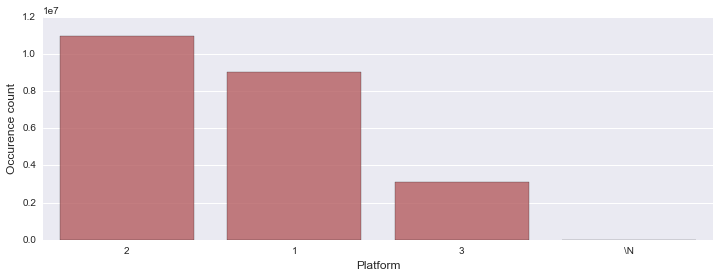

In [30]:
df_events.platform = df_events.platform.astype(str)
plat = df_events.platform.value_counts()

plt.figure(figsize=(12,4))
sns.barplot(plat.index, plat.values, alpha=0.8, color=p[2])
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Occurence count', fontsize=12)